In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drinks/drinks.csv


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/drinks/drinks.csv", encoding='latin-1')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


**Highest beer serving nation**

In [6]:
df_beer = df.sort_values(by='beer_servings', ascending=False)
df_beer.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
65,Germany,346,117,175,11.3,EU
98,Lithuania,343,244,56,12.9,EU
135,Poland,343,215,56,10.9,EU
188,Venezuela,333,100,3,7.7,SA
81,Ireland,313,118,165,11.4,EU
129,Palau,306,63,23,6.9,OC
140,Romania,297,122,167,10.4,EU


In [7]:
px.bar(x='country', y='beer_servings', data_frame=df_beer.head(15), title="Top 15 Countries with highest beer serving")

**Highest wine serving nation**

In [8]:
df_wine = df.sort_values(by='wine_servings', ascending=False)
df_wine.head(15)
df_wine = df.sort_values(by='wine_servings', ascending=False)
df_wine.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU
3,Andorra,245,138,312,12.4,EU
166,Switzerland,185,100,280,10.2,EU
48,Denmark,224,81,278,10.4,EU
156,Slovenia,270,51,276,10.6,EU
99,Luxembourg,236,133,271,11.4,EU
42,Croatia,230,87,254,10.2,EU
83,Italy,85,42,237,6.5,EU
55,Equatorial Guinea,92,0,233,5.8,AF


In [9]:
px.bar(x='country', y='wine_servings', data_frame=df_beer.head(15), title="Top 15 Countries with highest wine serving")

**Heatmap Correlation**

/tmp/ipykernel_20/2734967543.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



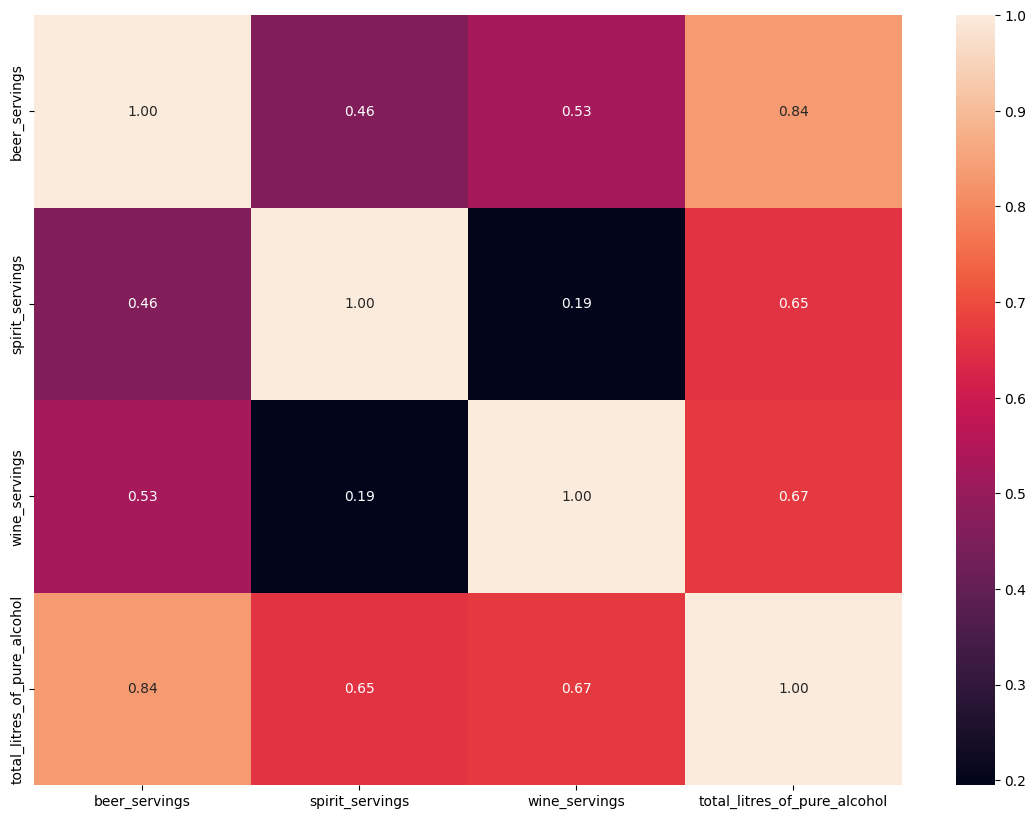

In [10]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

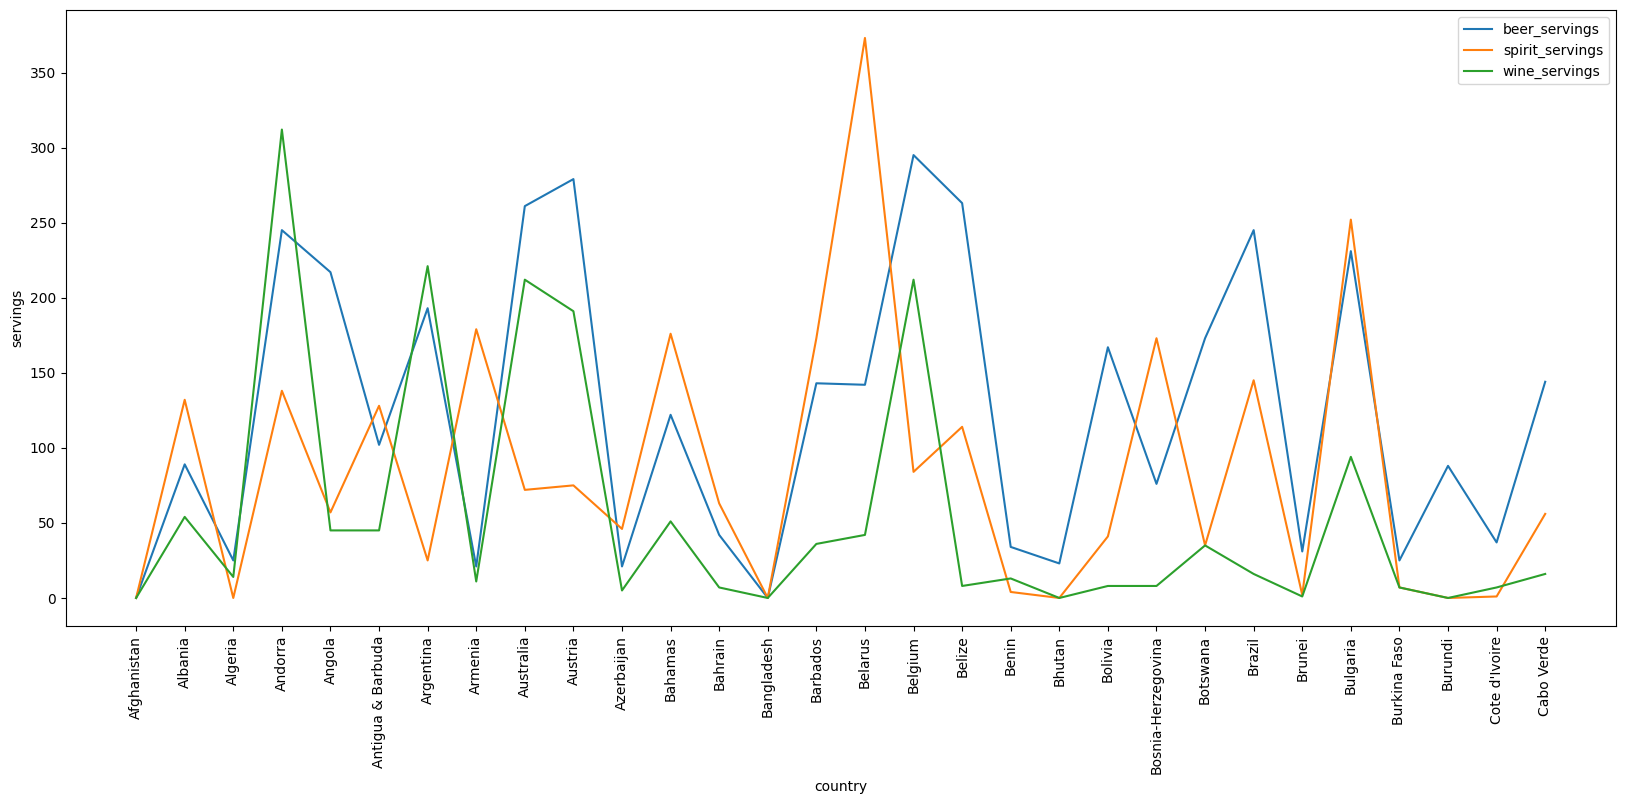

In [11]:
plt.figure(figsize=(20,8))
plt.plot(df['country'].head(30),df['beer_servings'].head(30))
plt.plot(df['country'].head(30),df['spirit_servings'].head(30))
plt.plot(df['country'].head(30),df['wine_servings'].head(30))
plt.xticks(rotation=90)
plt.xlabel("country")
plt.ylabel("servings")
plt.legend(['beer_servings','spirit_servings','wine_servings'])

**Distribution of Pure alcohol**

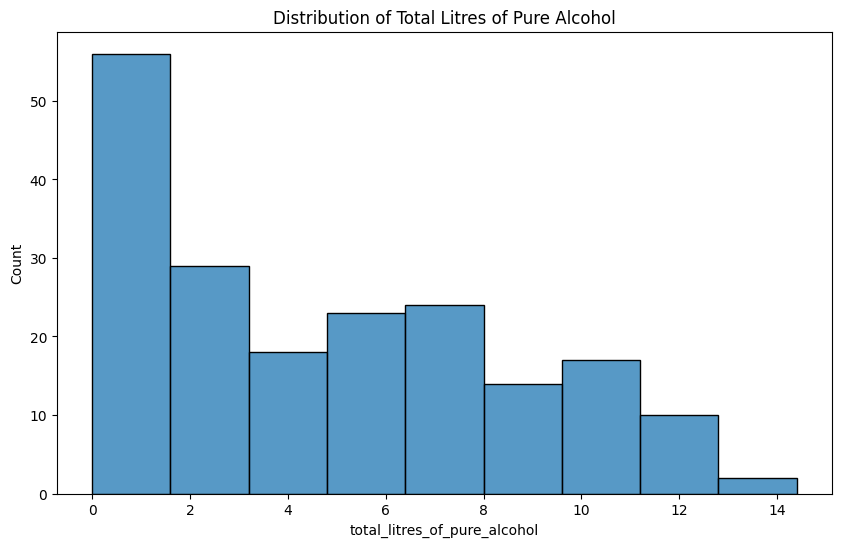

In [12]:
plt.figure(figsize = (10,6))
sns.histplot(df['total_litres_of_pure_alcohol'])
plt.title("Distribution of Total Litres of Pure Alcohol")
plt.show()

**Relation of country-wise beer serving**

In [13]:
px.line(x='country', y='beer_servings', data_frame=df, title="Relation of Beer serving and Countries")

**Countries with the least alcohol consumption**

In [14]:
df['country'].loc[df['beer_servings']==df['beer_servings'].min()]

0           Afghanistan
13           Bangladesh
40         Cook Islands
46          North Korea
79                 Iran
90               Kuwait
97                Libya
103            Maldives
106    Marshall Islands
107          Mauritania
111              Monaco
128            Pakistan
147          San Marino
149        Saudi Arabia
158             Somalia
Name: country, dtype: object